In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import IPython.display

IPython.display.display(
    IPython.display.HTML(
        data="""\
    <style>
        div#notebook-container    { width: 100%; }
        div#menubar-container     { width: 100%; }
        div#maintoolbar-container { width: 100%; }
    </style>
        """
    )
)

### Law of the iterated logarithm (LIL)

Given iid. $X_1, \cdots X_n$ rvs from a distribution with zero mean and unit variance, let $S_n = \sum_{i=1}^n X_n$, according to https://en.wikipedia.org/wiki/Law_of_the_iterated_logarithm, LIL says

\begin{align*}
\limsup_{n \rightarrow \infty} \frac{|S_n|}{\sqrt{2n \log\log n}} = 1
\end{align*}

Hence,

\begin{align*}
-1 \le& \frac{S_n}{\sqrt{2n \log\log n}} \le 1 \\
-1 \le& \frac{\bar{X}_n}{\sqrt{\frac{2\log\log n}{n}}} \le 1 \\
-\sqrt{\frac{2\log\log n}{n}} \le& \bar{X}_n \le \sqrt{\frac{2\log\log n}{n}} \\
\end{align*}

In [3]:
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

In [4]:
np.random.seed(123)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 116.55it/s]


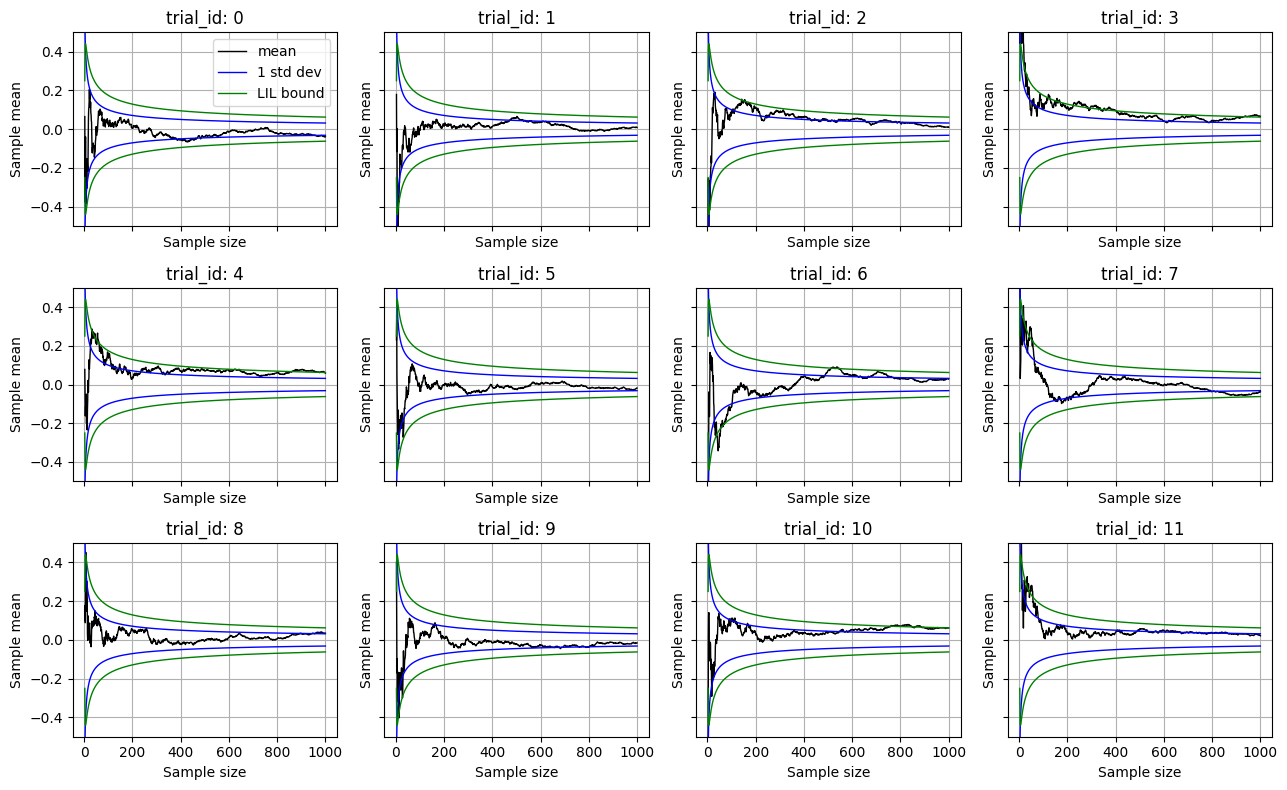

In [5]:
fig, axes = plt.subplots(3, 4, figsize=(13, 8), sharex=True, sharey=True)
axes = axes.ravel()

num_trials = 12
sample_size = 1000

dfs = []
for index in tqdm(range(num_trials)):
    df_plot = (
        pd.Series(scipy.stats.norm().rvs(size=sample_size))
        .to_frame(name="x")
        .assign(
            n=lambda df: range(1, len(df) + 1),
            std=lambda df: 1 / np.sqrt(df["n"]),
            mean=lambda df: df["x"].cumsum() / df["n"],
        )
        .loc[lambda df: df.n > 2]  # to avoid log of 0 when calculating LIL bound.
        .assign(
            lil_bound=lambda df: np.sqrt(2 * np.log(np.log(df["n"])) / df["n"]),
            ratio=lambda df: df["mean"] / df["lil_bound"],
            trial_id=index,
        )
    )
    dfs.append(df_plot.assign(trial_id=index))

    ax = axes[index]

    ax.plot(df_plot["n"], df_plot["mean"], color="black", lw=1, label="mean")
    ax.plot(df_plot["n"], df_plot["std"], color="blue", lw=1, label="1 std dev")
    ax.plot(df_plot["n"], -df_plot["std"], color="blue", lw=1)
    ax.plot(df_plot["n"], df_plot["lil_bound"], color="green", lw=1, label="LIL bound")
    ax.plot(df_plot["n"], -df_plot["lil_bound"], color="green", lw=1)
    ax.set(title=f"trial_id: {index}", xlabel="Sample size", ylabel="Sample mean")
    ax.set_ylim(-0.5, 0.5)
    ax.grid()
    
    if index == 0:
        ax.legend()

plt.tight_layout()

What the Law of iterated logarithm says is basically that the black line should stay inside the green bounds as $n \rightarrow \infty$. Note, this may not always be True when $n$ is small.

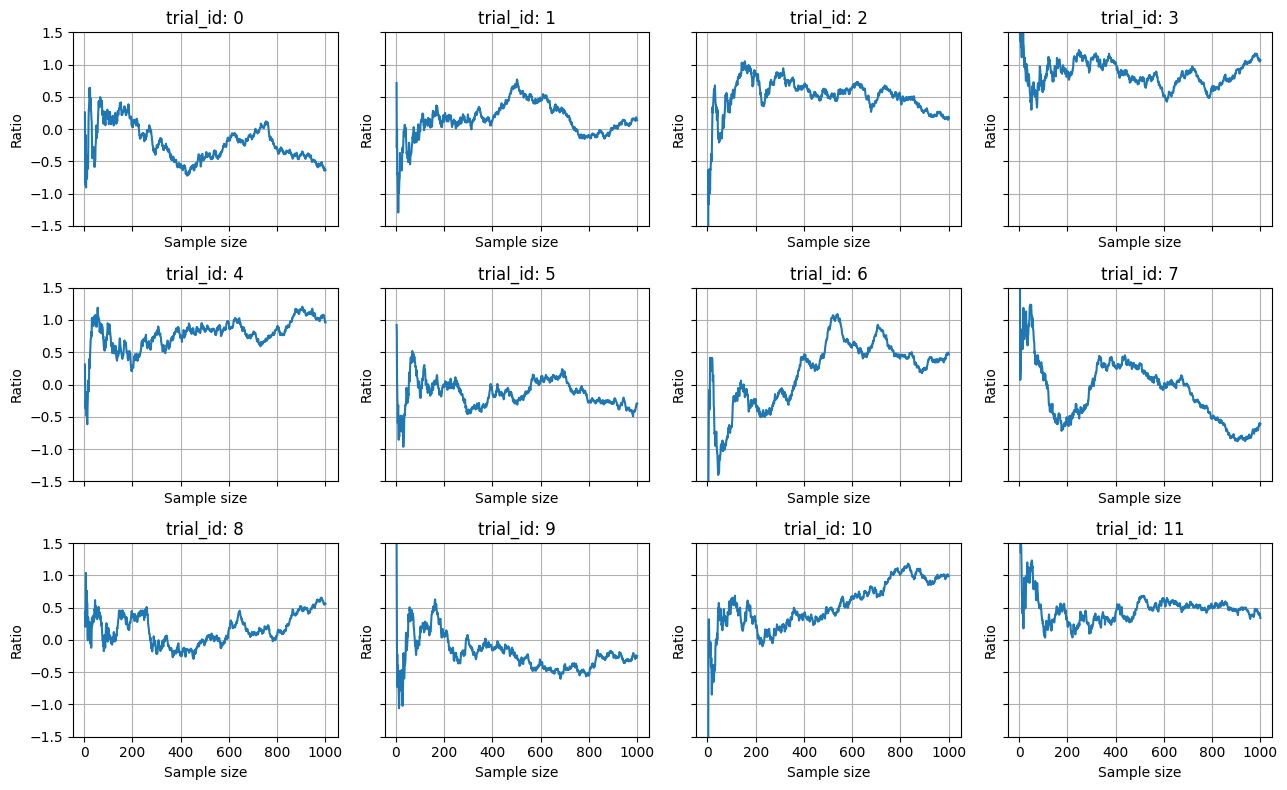

In [6]:
fig, axes = plt.subplots(3, 4, figsize=(13, 8), sharex=True, sharey=True)
axes = axes.ravel()

for index, df in enumerate(dfs):
    ax=axes[index]
    ax.plot(df["n"], df["ratio"])
    ax.set(title=f"trial_id: {index}", xlabel="Sample size", ylabel="Ratio")
    ax.grid()
    ax.set_ylim(-1.5, 1.5)
    
plt.tight_layout()

The ratio is guaranteed to vibrate between -1 and 1 as $n \rightarrow \infty$.